# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [24]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [26]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_="data-row")
all_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    td = row.find_all('td')
    rows = [col.text for col in td]
    mars_weather_data.append(rows)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_weather_data, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [13]:
# 2. How many sols (Martian days) worth of data are there?
df.sol.unique()

array([  10,   11,   12, ..., 1975, 1976, 1977])

In [14]:
# 3. What is the average minimum temperature by month?
min_temp_by_month = df.groupby('month')['min_temp'].mean()
min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

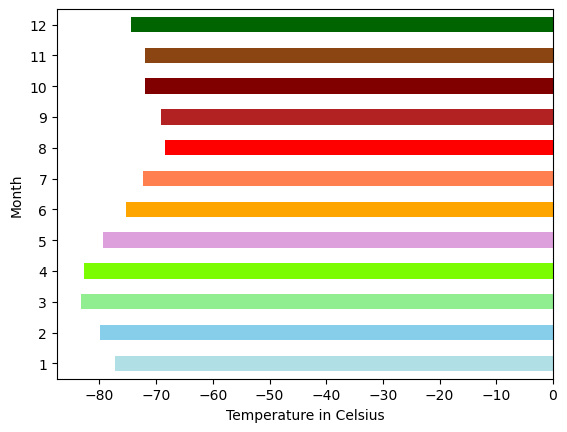

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the average minimum temperature by month
color = ['powderblue', 'skyblue', 'lightgreen', 'lawngreen', 'plum', 'orange', 'coral', 'red', 'firebrick', 'maroon', 'saddlebrown', 'darkgreen']
avg_min_temp_plot = min_temp_by_month.plot(kind='barh', color=color)
avg_min_temp_plot.set_xlabel("Temperature in Celsius")
avg_min_temp_plot.set_ylabel("Month")
plt.show()
plt.tight_layout()

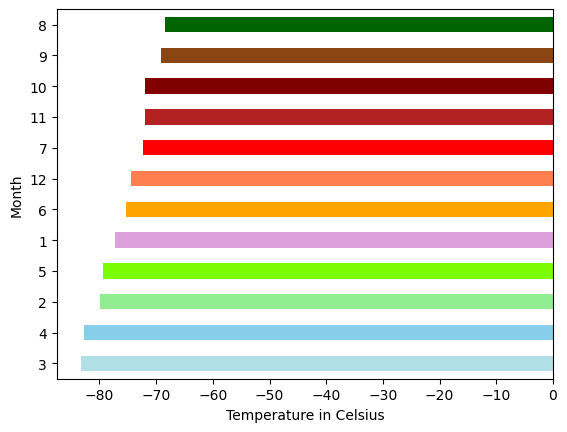

<Figure size 640x480 with 0 Axes>

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
color = ['powderblue', 'skyblue', 'lightgreen', 'lawngreen', 'plum', 'orange', 'coral', 'red', 'firebrick', 'maroon', 'saddlebrown', 'darkgreen']
min_temp_plot = min_temp_by_month.sort_values().plot(kind='barh', color=color)
min_temp_plot.set_xlabel("Temperature in Celsius")
min_temp_plot.set_ylabel("Month")

plt.show()
plt.tight_layout()

In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

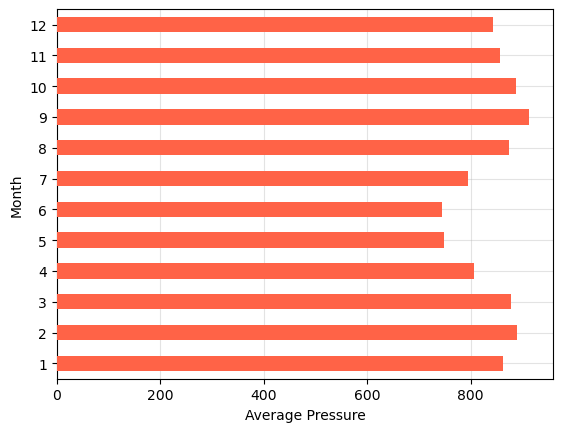

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot the average pressure by month
#color = ['powderblue', 'skyblue', 'lightgreen', 'lawngreen', 'plum', 'orange', 'coral', 'red', 'firebrick', 'maroon', 'saddlebrown', 'darkgreen']
avg_pressure_plot = avg_pressure_by_month.plot(kind='barh', zorder=3, color="tomato") #, color=color)
avg_pressure_plot.set_xlabel("Average Pressure")
avg_pressure_plot.set_ylabel("Month")
avg_pressure_plot.grid(True, zorder=0, alpha=0.35)
plt.show()
plt.tight_layout()

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month.sort_values()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

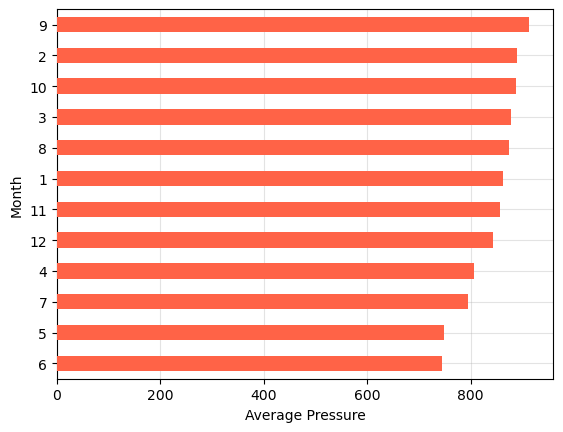

In [20]:
# plot the sorted values
min_pressure_plot = avg_pressure_by_month.sort_values().plot(kind='barh', color='tomato', zorder=3)
min_pressure_plot.set_ylabel("Month")
min_pressure_plot.set_xlabel("Average Pressure")
min_pressure_plot.grid(True, zorder=0, alpha=0.35)
plt.show()

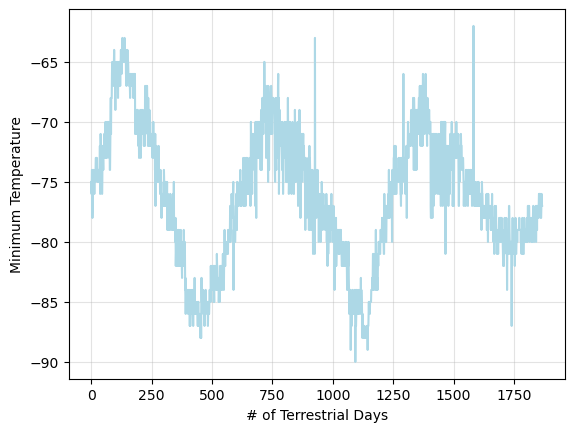

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.min_temp.plot(color="lightblue", zorder=3)
plt.grid(True, zorder=0, alpha=0.35)
plt.xlabel("# of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

#### Minimum Temperature

From the website (https://static.bc-edx.com/data/web/mars_facts/temperature.html) I was able to pull data from months Jan-Dec showing the minimum/coldest temperatures on Mars. After plotting and sorting the Months of the Year with the Minimum Temperatures found on Mars, we can clearly see that on average the coldest months of the year are March and April, and the hottest months of the year on average are August and September. We are not provided enough imformation to be able to figure out why these months are colder than others. If we did a deeper analysis we might be able to compare these temperatures to other planets to be able to give us more context.

#### Atmospheric Pressure

From the website (https://static.bc-edx.com/data/web/mars_facts/temperature.html) I pulled the data about Pressure on Mars, without knowing the measurement used to measure pressure, again we are without much further knowledge about this particular dataset. I did however calculate average pressure by month from Jan-Dec. I then plotted this data and sorted it to find the months with the lowest and highest pressure on Mars. The month with the lowest pressure appears to be June, and the month with the highest pressure appears to be September. Again, without more information about the context of this data I was unable to perform a deeper analysis of the significance of why pressure is higher or lower during these months.

#### Year Length

From the analysis on minimum temperature from Jan-Dec across the entire data set in our data frame we can see that there are over 1750 and maybe a little under 2000 Earth days in a Martain year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [23]:
browser.quit()